In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from tensorflow.examples.tutorials.mnist import input_data

In [42]:
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print("Size of:")
print("\t- Training set:\t\t%d"%len(data.train.labels))
print("\t- Test set:\t\t%d"%len(data.test.labels))
print("\t- Validation set:\t%d"%len(data.validation.labels))

Size of:
	- Training set:		55000
	- Test set:		10000
	- Validation set:	5000


In [4]:
data.test.labels[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [5]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [6]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [7]:
img_size = 28
img_size_flat = img_size*img_size
img_shape = (img_size, img_size)
num_classes = 10

In [8]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap="binary")
        if cls_pred is None:
            xlabel = "True: %d" %cls_true[i]
        else:
            xlabel = "True: %d, Pred: %d"%(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

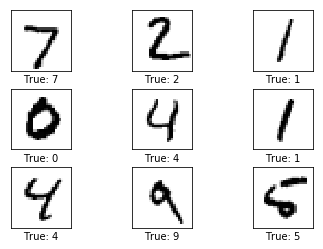

In [9]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images, cls_true)

In [10]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [11]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [12]:
logits = tf.matmul(x, weights) + biases

In [13]:
y_pred = tf.nn.softmax(logits)

In [14]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [15]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [16]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch_size = 100

In [18]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        sess.run(optimizer,feed_dict=feed_dict_train)

In [19]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [20]:
def print_accuracy():
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on Test set: {0:.1%}".format(acc))

In [21]:
def print_confusion_matrix():
    cls_true = data.test.cls
    cls_pred = sess.run(y_pred_cls, feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

In [22]:
def plot_example_errors():
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    incorrect = (correct == False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]

    cls_true = data.test.cls[incorrect]
    
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [23]:
def plot_weights():
    w = sess.run(weights)
    w_min = np.min(w)
    w_max = np.max(w)
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i<10:
            image = w[:, i].reshape(img_shape)
            ax.set_xlabel("Weights: {0}".format(i))

            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [24]:
print_accuracy()

Accuracy on Test set: 9.8%


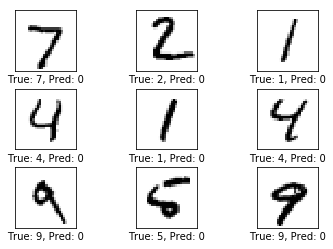

In [25]:
plot_example_errors()

In [26]:
optimize(num_iterations=1)

In [27]:
print_accuracy()

Accuracy on Test set: 29.2%


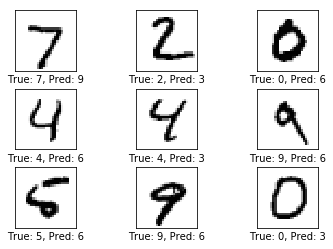

In [28]:
plot_example_errors()

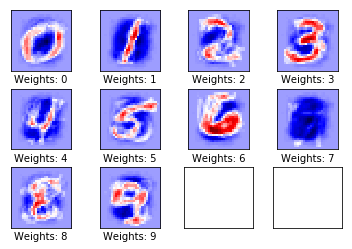

In [29]:
plot_weights()

Accuracy on Test set: 80.1%


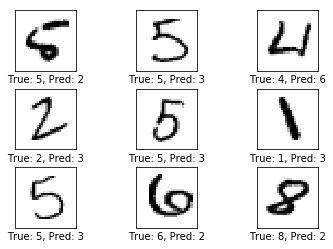

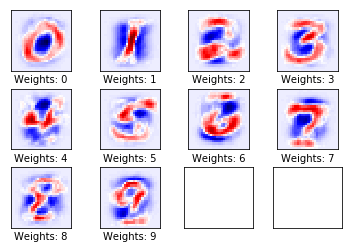

In [30]:
optimize(num_iterations=9)
print_accuracy()
plot_example_errors()
plot_weights()

Accuracy on Test set: 88.7%


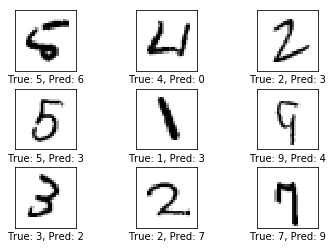

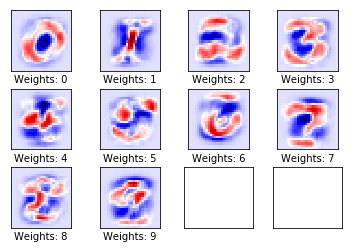

In [31]:
optimize(num_iterations=90)
print_accuracy()
plot_example_errors()
plot_weights()

Accuracy on Test set: 91.4%


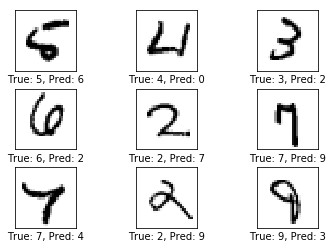

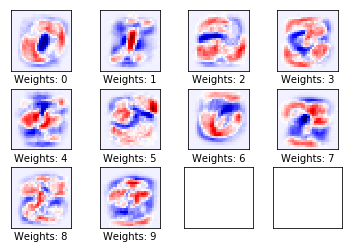

In [32]:
optimize(num_iterations=900)
print_accuracy()
plot_example_errors()
plot_weights()

[[ 970    0    3    1    0    2    2    1    1    0]
 [   0 1116    4    2    0    1    4    2    6    0]
 [  11    7  944   16    9    1    6   10   20    8]
 [   3    0   26  941    0   12    1    9    9    9]
 [   3    4   12    1  873    0    5    2    4   78]
 [  15    5    9   55    9  747    9    8   23   12]
 [  26    3   18    2    9   13  883    2    2    0]
 [   4   10   28   10    5    1    0  919    0   51]
 [  12   14   18   40    9   28    8    9  809   27]
 [  13    7    2   13   11    5    0   17    3  938]]


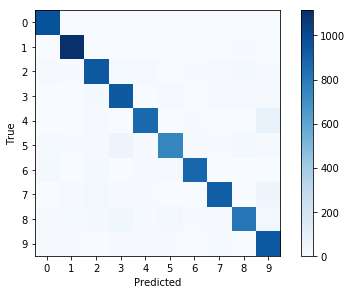

In [33]:
print_confusion_matrix()

Accuracy on Test set: 92.2%


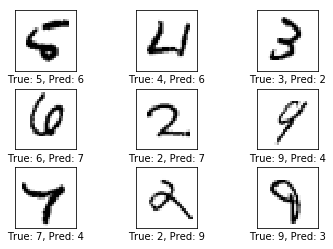

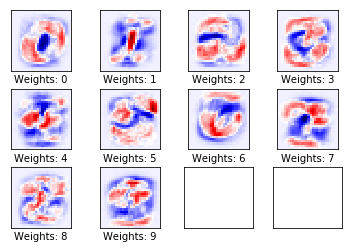

[[ 961    0    2    1    0    4    9    1    2    0]
 [   0 1109    2    2    0    2    4    2   14    0]
 [   6    9  917   17   11    4   13   14   36    5]
 [   3    0   22  919    0   25    4   11   18    8]
 [   1    2    5    1  919    0   10    2    9   33]
 [   9    4    4   38    9  772   16    6   26    8]
 [  13    3    3    2    9   13  911    3    1    0]
 [   2   10   23   10    8    1    0  940    2   32]
 [   8    8    6   22    9   33    9   10  862    7]
 [  10    7    2   10   34    7    0   26    8  905]]


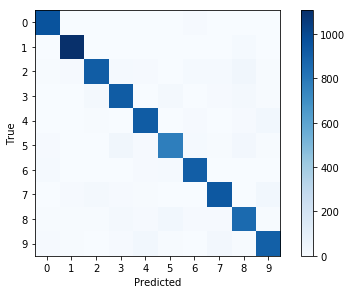

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
optimize(num_iterations=900)
print_accuracy()
plot_example_errors()
plot_weights()
print_confusion_matrix()

In [35]:
sess.close()

### 1. Change the learning rate of the optimizer

In [36]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()

batch_size = 100

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(5000):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        sess.run(optimizer, feed_dict=feed_dict_train)
    feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}
    acc = sess.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on test set is: {0:.1%}".format(acc))

Accuracy on test set is: 90.1%


### 2. Change the optimizer to Adam or Adagrad

In [37]:
x = tf.placeholder(tf.float32, shape=(None, img_size_flat))
y_true = tf.placeholder(tf.float32, shape=(None, num_classes))
y_true_cls = tf.placeholder(tf.int64, shape=(None))

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()

batch_size = 100

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(2000):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        sess.run(optimizer, feed_dict=feed_dict_train)
    feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}
    acc = sess.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on test set is: {0:.1%}".format(acc))

Accuracy on test set is: 90.1%


### 3. Change batch size

In [38]:
x = tf.placeholder(tf.float32, shape=(None, img_size_flat))
y_true = tf.placeholder(tf.float32, shape=(None, num_classes))
y_true_cls = tf.placeholder(tf.int64, shape=(None))

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()

batch_size = 1000

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(500):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        sess.run(optimizer, feed_dict=feed_dict_train)
    feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}
    acc = sess.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on test set is: {0:.1%}".format(acc))

Accuracy on test set is: 87.9%


### 4. Print Logit value for each incorrect image 

Accuracy on test set is: 89.1%


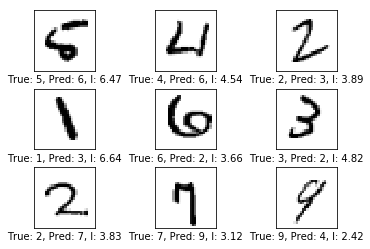

In [39]:
x = tf.placeholder(tf.float32, shape=(None, img_size_flat))
y_true = tf.placeholder(tf.float32, shape=(None, num_classes))
y_true_cls = tf.placeholder(tf.int64, shape=(None))

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()

batch_size = 1000

def plot_images(images, cls_true, cls_pred=None, logit = logits):
    assert len(images) == len(cls_true) == 9
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap="binary")
        if cls_pred is None:
            xlabel = "True: %d" %cls_true[i]
        else:
            xlabel = "True: %d, Pred: %d, l: %.2f"%(cls_true[i], cls_pred[i], logit[i])
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        sess.run(optimizer, feed_dict=feed_dict_train)
    feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}
    acc = sess.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on test set is: {0:.1%}".format(acc))
    
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)
    l = sess.run(logits, feed_dict=feed_dict_test)
    l = np.max(l, axis=1)

    incorrect = (correct == False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]

    cls_true = data.test.cls[incorrect]
    
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9],
                logit=l[0:9])

### 5. Use sparse_softmax_cross_entropy_with_logits instead of softmax_cross_entropy_with_logits.

In [40]:
x = tf.placeholder(tf.float32, shape=(None, img_size_flat))
y_true = tf.placeholder(tf.float32, shape=(None, num_classes))
y_true_cls = tf.placeholder(tf.int64, shape=(None))

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y_true_cls)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()

batch_size = 100

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(2000):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        y_true_batch_cls = np.array([label.argmax() for label in y_true_batch])
        feed_dict_train = {x: x_batch, y_true_cls: y_true_batch_cls}
        sess.run(optimizer, feed_dict=feed_dict_train)
    feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}
    acc = sess.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on test set is: {0:.1%}".format(acc))

Accuracy on test set is: 90.2%
